## 1. Import Libraries and Dataset

### 1.1 Import Libraries

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
np.random.seed(42)

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import matplotlib.pyplot as plt # Import matplotlib for data visualisation
# import seaborn as sns # Statistical data visualization
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots


### 1.2 Load Dataset

Dataset that's imported is a dataset which has already going through the process of undersampling

The undersampling algorithm which i used is NeighbourhoodCleaningRule, to handle the severe imbalance class label of the original dataset.

In [3]:
# Or i can use this new one
new_rfc_feature_df = pd.read_csv('data/new_rfc_removed_feature_ncr.csv')
new_rfc_label_df = pd.read_csv('data/new_rfc_removed_label_ncr.csv')

In [4]:
# Combine label column with rfc feature columns 
after_resampling_df = new_rfc_feature_df.assign(HeartDisease= new_rfc_label_df)
after_resampling_df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,28.87,1,0,0,6.0,1,0,77.0,0,0,1,0,0,0,1
1,34.30,1,0,0,30.0,1,1,62.0,2,0,0,1,0,0,1
2,29.18,0,0,0,1.0,0,0,52.0,0,1,3,0,0,0,0
3,26.17,1,0,0,0.0,0,0,47.0,0,1,3,0,0,0,0
4,32.98,1,0,1,10.0,1,1,77.0,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118281,23.38,0,0,0,0.0,0,0,62.0,0,1,4,0,0,0,0
118282,22.22,0,0,0,0.0,0,0,21.0,0,1,4,0,0,0,0
118283,27.41,1,0,0,7.0,1,1,62.0,2,0,1,1,0,0,1
118284,29.84,1,0,0,0.0,0,1,37.0,0,1,3,1,0,0,0


### Removing Outliers


In [ ]:
# fig = px.box(after_resampling_df['BMI'], y="BMI")
# fig.show()

In [ ]:
# # The change outlier values in BMI to median values (26.63)
# after_resampling_df.loc[(after_resampling_df.BMI > 40.79), 'BMI'] = 26.57

# after_resampling_df.loc[(after_resampling_df.BMI < 12.91), 'BMI'] = 26.57



In [ ]:
# fig = px.box(after_resampling_df['BMI'], y="BMI")
# fig.show()

### Train-Test split

In [5]:
x = after_resampling_df.drop(columns=['HeartDisease'],axis=1)
y = after_resampling_df['HeartDisease']

In [6]:
# train_test split using Ncr technique 50% on resampling data
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# np.random.seed(42)

# # Split into train and valid set
# X_train_new, X_val, y_train_new, y_val = train_test_split(X_train ,#independent variable
#                                                    y_train ,#dependent variable
#                                                    test_size=0.2)

In [ ]:
# Tuning and evaluate model using only 10k datapoints.
# X_train_small = X_train_new[:][:10000]
# y_train_small = y_train_new[:][:10000]
# y_train_small.shape

In [ ]:
# # Setup Random Seed
# np.random.seed(42)

# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [10,15,25,50,None],
#     'max_features': [2, 3,4, 'sqrt'],
#     'min_samples_leaf': [3, 4, 5,6],
#     'min_samples_split': [3,4,5,6],
#     'n_estimators': [150,200,500,1000]
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# gs_rfc = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)

# # Fit the grid search to the data
# gs_rfc.fit(X_train_small,y_train_small)

In [ ]:
# gs_rfc.best_params_

In [ ]:
# gs_rfc.best_estimator_

### Normalization

In [7]:
#Scale the feature for Train-Test
np.random.seed(42)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [ ]:
# #Scale the feature for Train-Test
# np.random.seed(42)

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sc = MinMaxScaler()
# X_train_new = sc.fit_transform(X_train_new)
# X_val = sc.transform(X_val)

In [ ]:
# #Scale the feature for Train-Test
# np.random.seed(42)

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sc = MinMaxScaler()
# X_train_small = sc.fit_transform(X_train_small)


In [ ]:
# param_grid = [    
#     {'penalty' : ['l2', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','sag'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }
# ]

# # Setup Random Seed
# np.random.seed(42)

# gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# gs_log_reg.fit(X_train_small,y_train_small)

# gs_log_reg.best_estimator_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


LogisticRegression(C=1.623776739188721)

In [ ]:
# gs_log_reg.best_params_

{'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

> ### Evaluate Model


In [ ]:
# define model
rfc = RandomForestClassifier(random_state=42,max_depth=25, max_features=4, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=150)
# fit it
rfc.fit(X_train_sc,y_train.values.ravel())
# test
y_pred = rfc.predict(X_test_sc)
train_pred = rfc.predict(X_train_sc)

# performance
print(f'Training Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

In [11]:
# define model
rfc = RandomForestClassifier(random_state=42)
# fit it
rfc.fit(X_train_sc,y_train.values.ravel())
# test
y_pred = rfc.predict(X_test_sc)
train_pred = rfc.predict(X_train_sc)

# performance
print(f'Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Accuracy Score: 0.9993659382001099
Accuracy Score: 0.9770056640459887
Confusion Matrix: 
[[18078   166]
 [  378  5036]]
Area Under Curve: 0.9605410651832278
Recall score: 0.9301810121906169
Clasification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     18244
           1       0.97      0.93      0.95      5414

    accuracy                           0.98     23658
   macro avg       0.97      0.96      0.97     23658
weighted avg       0.98      0.98      0.98     23658



In [19]:
# define model
lg2 = LogisticRegression(random_state=42)
# fit it
lg2.fit(X_train_sc,y_train)
# test
y_pred = lg2.predict(X_test_sc)
train_pred = lg2.predict(X_train_sc)

# performance
print(f'Training Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Training Accuracy Score: 0.9648729762860887
Accuracy Score: 0.9645363090709274
Confusion Matrix: 
[[17987   257]
 [  582  4832]]
Area Under Curve: 0.9392070502332337
Recall score: 0.8925009235315848
Clasification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18244
           1       0.95      0.89      0.92      5414

    accuracy                           0.96     23658
   macro avg       0.96      0.94      0.95     23658
weighted avg       0.96      0.96      0.96     23658



In [ ]:
# define model
knn = KNeighborsClassifier()
# fit it
knn.fit(X_train_sc,y_train)
# test
y_pred = knn.predict(X_test_sc)
train_pred = knn.predict(X_train_sc)

# performance
print(f'Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Accuracy Score: 0.9740351692945006
Accuracy Score: 0.9657198410685603
Confusion Matrix: 
[[17989   255]
 [  556  4858]]
Area Under Curve: 0.9416630448947716
Recall score: 0.8973032877724418
Clasification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18244
           1       0.95      0.90      0.92      5414

    accuracy                           0.97     23658
   macro avg       0.96      0.94      0.95     23658
weighted avg       0.97      0.97      0.97     23658



In [26]:
# define model
rfc = RandomForestClassifier(random_state=42,max_depth=25, max_features=4, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=150)
# fit it
rfc.fit(X_train_sc,y_train.values.ravel())
# test
y_pred = rfc.predict(X_test_sc)
train_pred = rfc.predict(X_train_sc)

# performance
print(f'Training Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Training Accuracy Score: 0.9796254808301983
Accuracy Score: 0.9736664130526672
Confusion Matrix: 
[[18086   158]
 [  465  4949]]
Area Under Curve: 0.9527255905600777
Recall score: 0.9141115626154415
Clasification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18244
           1       0.97      0.91      0.94      5414

    accuracy                           0.97     23658
   macro avg       0.97      0.95      0.96     23658
weighted avg       0.97      0.97      0.97     23658



In [25]:
# define model
lg2 = LogisticRegression(random_state=42, class_weight={0:0.3, 1:0.7},C=1.623776739188721)
# fit it
lg2.fit(X_train_sc,y_train)
# test
y_pred = lg2.predict(X_test_sc)
train_pred = lg2.predict(X_train_sc)

# performance
print(f'Training Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Training Accuracy Score: 0.9581202181172591
Accuracy Score: 0.957646462084707
Confusion Matrix: 
[[17665   579]
 [  423  4991]]
Area Under Curve: 0.9450663833126245
Recall score: 0.9218692279275951
Clasification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18244
           1       0.90      0.92      0.91      5414

    accuracy                           0.96     23658
   macro avg       0.94      0.95      0.94     23658
weighted avg       0.96      0.96      0.96     23658



In [20]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train_sc, y_train)
    #Update the training scores list
    train_scores.append(knn.score(X_train_sc, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test_sc , y_test))

In [ ]:
train_scores

In [ ]:
test_scores

Maximum KNN Score on the test data: 96.85%


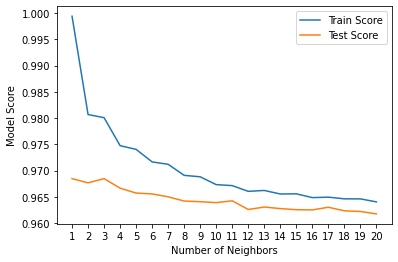

In [25]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

In [14]:
# define model
knn = KNeighborsClassifier(n_neighbors=11)
# fit it
knn.fit(X_train_sc,y_train)
# test
y_pred = knn.predict(X_test_sc)
train_pred = knn.predict(X_train_sc)

# performance
print(f'Training Accuracy Score: {accuracy_score(y_train,train_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Clasification Report : \n {classification_report(y_test,y_pred)}')

Training Accuracy Score: 0.9671344633723633
Accuracy Score: 0.9642404260715192
Confusion Matrix: 
[[17990   254]
 [  592  4822]]
Area Under Curve: 0.9383657374601178
Recall score: 0.8906538603620244
Clasification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18244
           1       0.95      0.89      0.92      5414

    accuracy                           0.96     23658
   macro avg       0.96      0.94      0.95     23658
weighted avg       0.96      0.96      0.96     23658



## Save the Model

In [27]:
import pickle
data = "logistic": lg2
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [28]:
with open('heart_model.pkl', 'rb') as file:
    data = pickle.load(file)

logistic_loaded = data["logistic"]
randomforest_loaded = data["randomforest"]
knn_loaded = data["knearestneighbor"]

### Testing the Saved Model with Unseen Data

In [29]:
X = ([[28.60, 1, 0, 0, 10, 1, 0, 55, 0, 0, 1, 0, 0, 0],[24.6, 0, 0, 0, 0, 0, 1, 24, 1, 4, 0, 0, 0, 0]])
X

[[28.6, 1, 0, 0, 10, 1, 0, 55, 0, 0, 1, 0, 0, 0],
 [24.6, 0, 0, 0, 0, 0, 1, 24, 1, 4, 0, 0, 0, 0]]

In [30]:
df_X = pd.DataFrame(X, 
columns= ['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','DiffWalking','Sex','AgeCategory','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'])

df_X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,28.6,1,0,0,10,1,0,55,0,0,1,0,0,0
1,24.6,0,0,0,0,0,1,24,1,4,0,0,0,0


In [31]:
X_testing = sc.transform(df_X)
X_testing

array([[0.20593715, 1.        , 0.        , 0.        , 0.33333333,
        1.        , 0.        , 0.57627119, 0.        , 0.        ,
        0.25      , 0.        , 0.        , 0.        ],
       [0.15625388, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.05084746, 0.33333333, 4.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [32]:
y_predict = logistic_loaded.predict(X_testing)
y_predict

array([1, 0], dtype=int64)

In [33]:
y_preds = randomforest_loaded.predict(X_testing)
y_preds

array([1, 0], dtype=int64)

In [34]:
y_preds = knn_loaded.predict(X_testing)
y_preds

array([1, 0], dtype=int64)